In [10]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
filepath = 'https://raw.githubusercontent.com/fedeamedeo/machine-learning-project/main/Data/'
interactions = pd.read_csv(filepath + 'interactions_train.csv')
items = pd.read_csv(filepath + 'items.csv')

In [3]:
#display data
display(interactions.head())
display(items.head())

,u,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,NaN,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


In [4]:
# Check for duplicates in the interactions DataFrame
duplicates = interactions.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows in interactions: {num_duplicates}")

# Display the duplicate rows if any
if num_duplicates > 0:
    print("Duplicate rows:")
    print(interactions[duplicates])

Number of duplicate rows in interactions: 2
Duplicate rows:
          u      i             t
6103   7210  12290  1.718023e+09
44025  1323  10037  1.700055e+09


In [5]:
# Drop duplicate rows from the interactions DataFrame
interactions = interactions.drop_duplicates()

# Verify the shape after dropping duplicates
print(f"Shape after dropping duplicates: {interactions.shape}")

Shape after dropping duplicates: (87045, 3)


In [6]:
# Convert 't' column to datetime
interactions['t'] = pd.to_datetime(interactions['t'], unit='s')


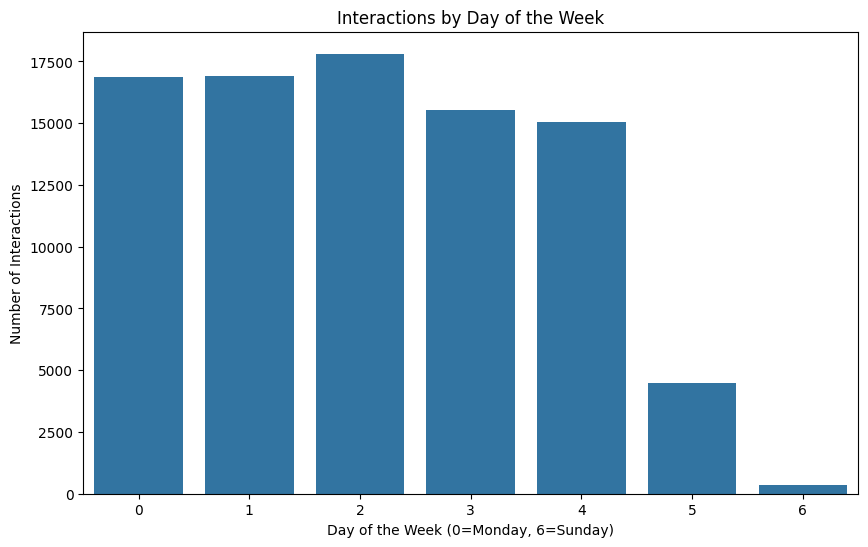

In [30]:
# prompt: plot interactions by day of the week

# Create a 'day_of_week' column
interactions['day_of_week'] = interactions['t'].dt.dayofweek

# Group interactions by day of the week and count interactions
# Use .size() to get the count of interactions for each day
interactions_by_day = interactions.groupby('day_of_week').size()

# Reset the index to have 'day_of_week' as a column
interactions_by_day = interactions_by_day.reset_index(name='counts')

# Plot the interactions by day of the week
plt.figure(figsize=(10, 6))
# Use 'day_of_week' and 'counts' columns for plotting
sns.barplot(x='day_of_week', y='counts', data=interactions_by_day)
plt.title('Interactions by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Interactions')
plt.show()


Basic Statistics:
Number of unique users: 7838
Number of unique items: 15109
Time range: 2023-01-02 12:47:23 to 2024-10-14 16:57:34


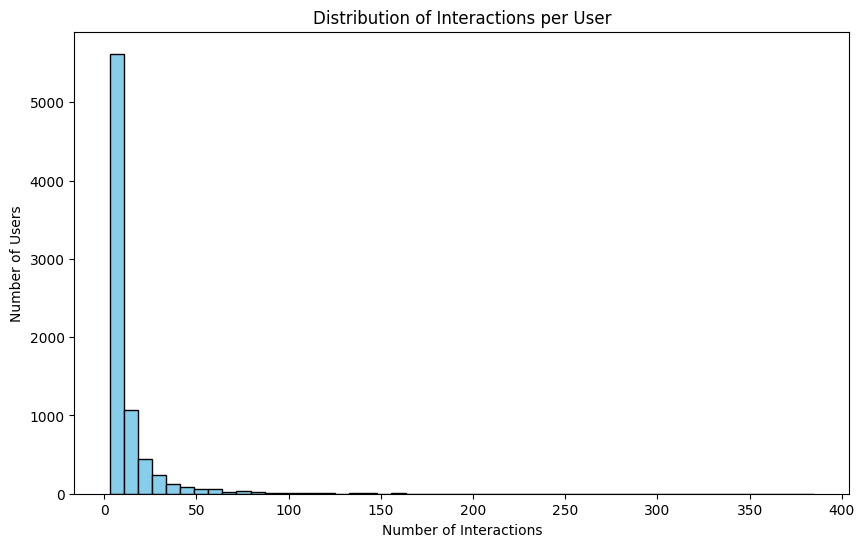

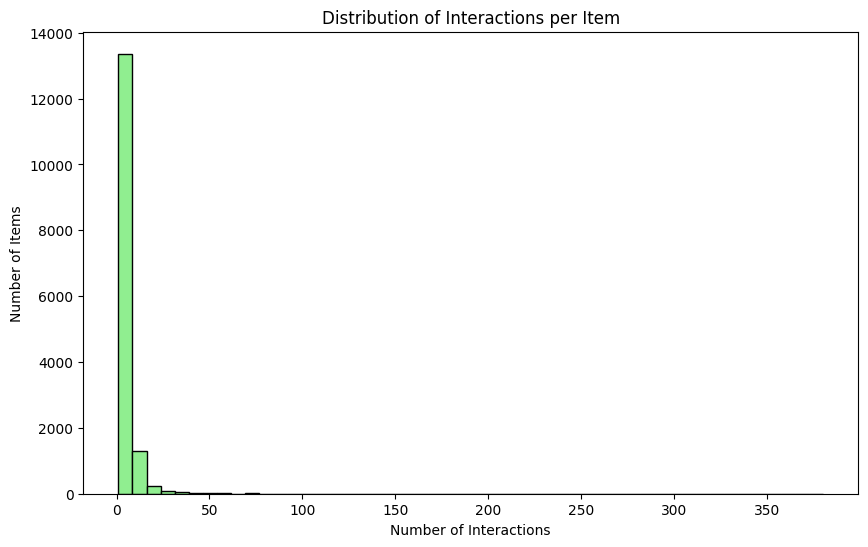

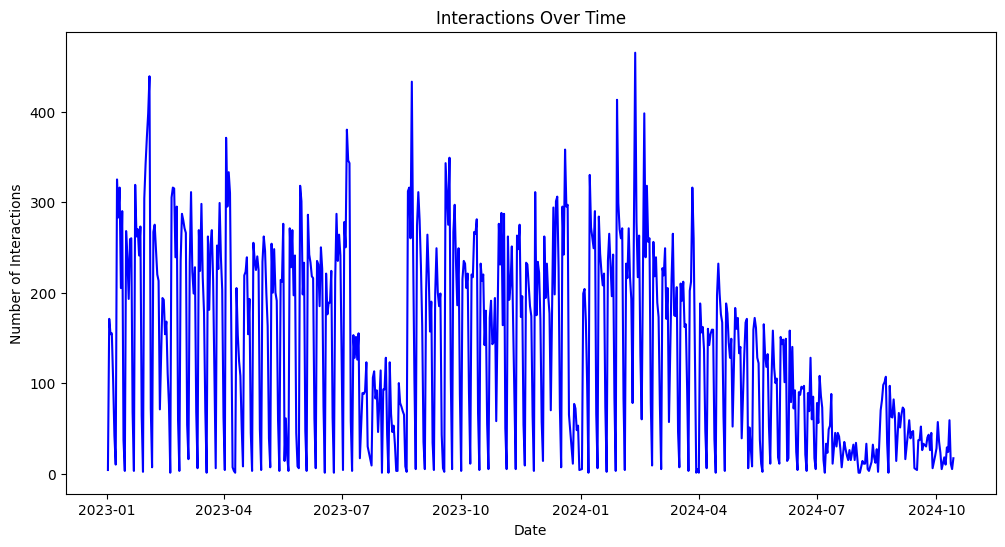

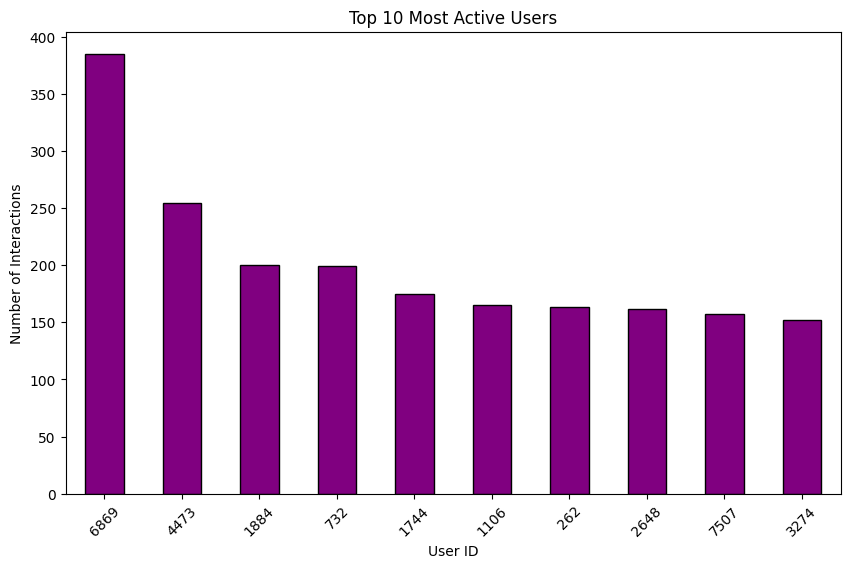

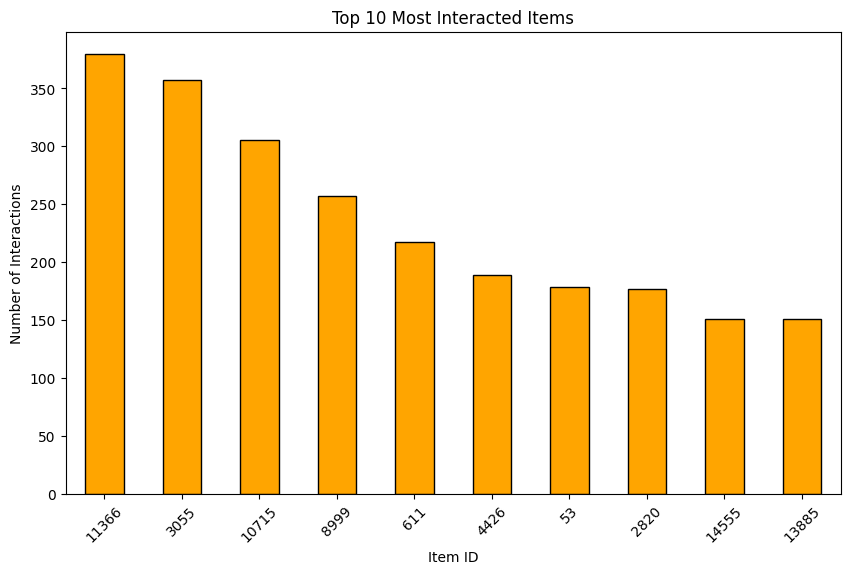

Sample of interactions_with_items dataset:
      u      i                   t  hour  day_of_week  month        date  \
0  4456   8581 2023-06-23 17:24:46    17            4      6  2023-06-23   
1   142   1964 2023-03-23 15:30:06    15            3      3  2023-03-23   
2   362   3705 2024-02-02 11:00:59    11            4      2  2024-02-02   
3  1809  11317 2023-01-12 14:19:22    14            3      1  2023-01-12   
4  4384   1323 2023-04-13 16:09:22    16            3      4  2023-04-13   

                                               Title                  Author  \
0                        Ashes falling for the sky /            Gorman, Nine   
1                                  La page blanche /           Boulet, 1975-   
2                                   Aysuun : roman /             Manook, Ian   
3                   Le cercle des rêveurs éveillés /  Barde-Cabuçon, Olivier   
4  L'examen clinique de l'aîné : guide d'évaluati...         Voyer, Philippe   

                   

In [27]:
# 1. Basic Statistics
print("Basic Statistics:")
print(f"Number of unique users: {interactions['u'].nunique()}")
print(f"Number of unique items: {interactions['i'].nunique()}")
print(f"Time range: {interactions['t'].min()} to {interactions['t'].max()}")

# 2. Interactions per User
user_interactions = interactions['u'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(user_interactions, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

# 3. Interactions per Item
item_interactions = interactions['i'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(item_interactions, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Interactions per Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Items')
plt.show()

# 4. Temporal Analysis
interactions['hour'] = interactions['t'].dt.hour
interactions['day_of_week'] = interactions['t'].dt.dayofweek
interactions['month'] = interactions['t'].dt.month

# Line plot of interactions over time
interactions['date'] = interactions['t'].dt.date
daily_interactions = interactions.groupby('date').size()
plt.figure(figsize=(12, 6))
daily_interactions.plot(kind='line', color='blue')
plt.title('Interactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Interactions')
plt.show()


# 5. Top Users and Items
top_users = user_interactions.head(10)
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

top_items = item_interactions.head(10)
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Interacted Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()


# 7. Merge with Metadata
interactions_with_items=pd.merge(interactions, items, on='i')
print("Sample of interactions_with_items dataset:")
print(interactions_with_items.head())

# 8. Missing Data in merged df
print("Missing Data in interactions_with_items:")
print(interactions_with_items.isnull().sum())

<ipython-input-31-ca83072d4531>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


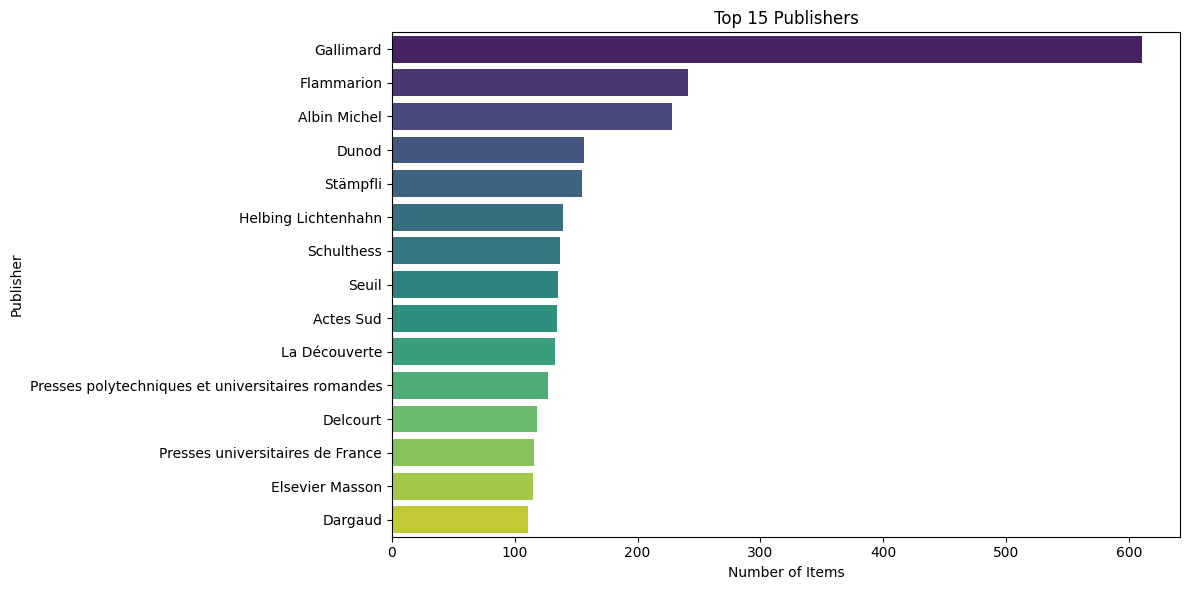

<ipython-input-31-ca83072d4531>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.values, y=author_counts.index, palette='coolwarm')


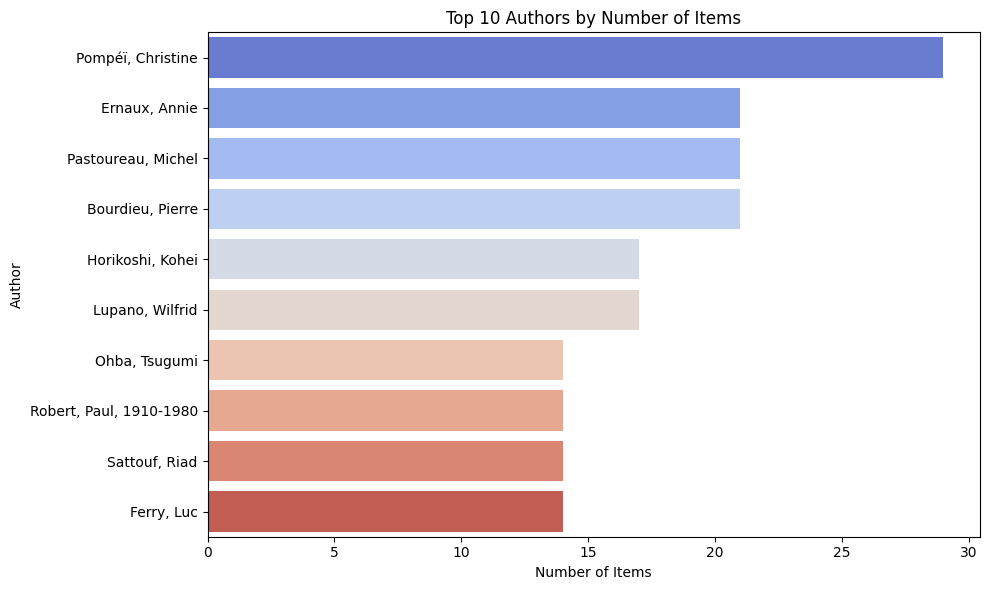

<ipython-input-31-ca83072d4531>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subjects.values, y=top_subjects.index, palette='mako')


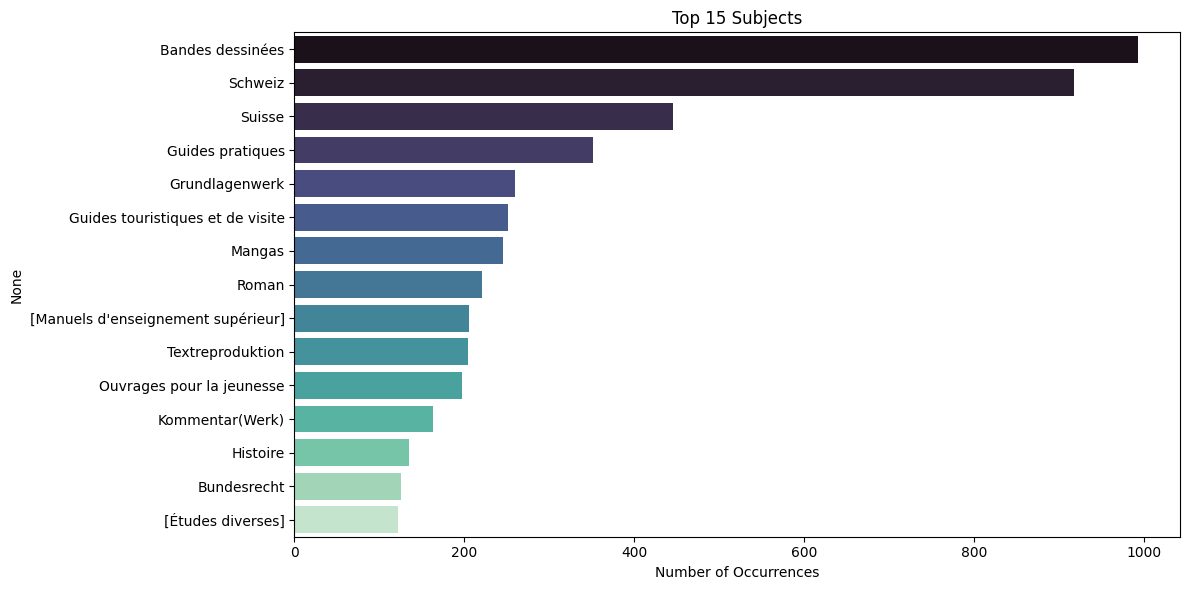

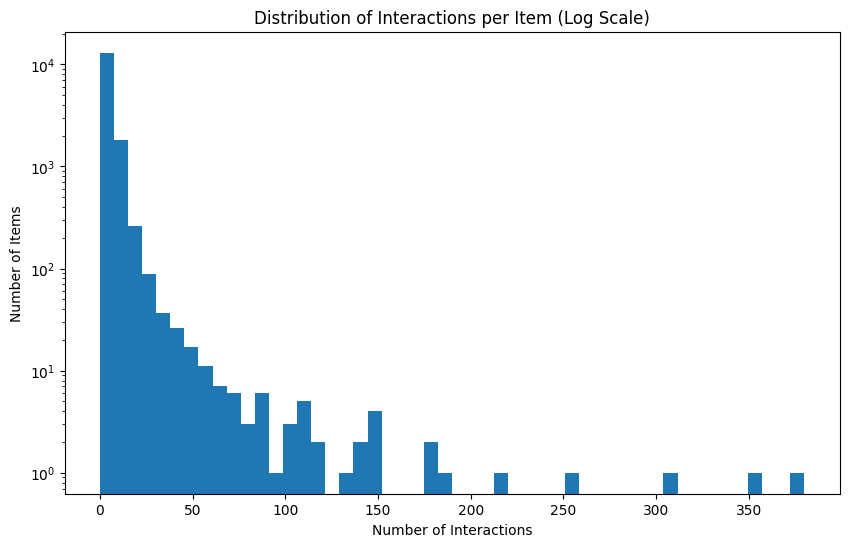

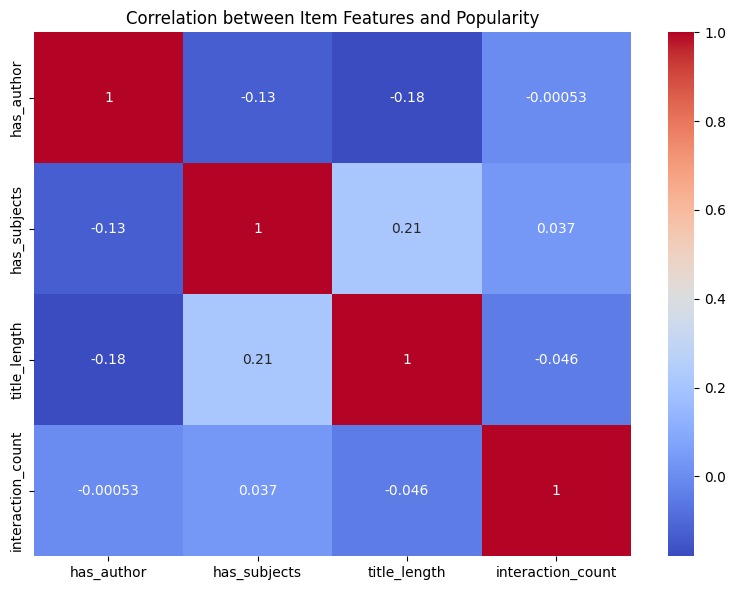

In [31]:
# Distribution of publishers
plt.figure(figsize=(12, 6))
top_publishers = items['Publisher'].value_counts().head(15)
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 15 Publishers')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()



# Author analysis
plt.figure(figsize=(10, 6))
author_counts = items['Author'].value_counts().head(10)
sns.barplot(x=author_counts.values, y=author_counts.index, palette='coolwarm')
plt.title('Top 10 Authors by Number of Items')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()

# Subject analysis
# Extract and count subjects (handling multiple subjects per item)
all_subjects = []
for subjects in items['Subjects'].dropna():
    subject_list = str(subjects).split(';')
    all_subjects.extend([subj.strip() for subj in subject_list])

subject_counts = pd.Series(all_subjects).value_counts()
plt.figure(figsize=(12, 6))
top_subjects = subject_counts.head(15)
sns.barplot(x=top_subjects.values, y=top_subjects.index, palette='mako')
plt.title('Top 15 Subjects')
plt.xlabel('Number of Occurrences')
plt.tight_layout()
plt.show()

# Analyze book popularity based on interactions
if 'interactions' in globals():
    plt.figure(figsize=(10, 6))

    # Reset the index of value_counts to create a DataFrame
    item_interaction_counts = interactions['i'].value_counts().reset_index()
    item_interaction_counts.columns = ['i', 'count']  # Rename columns for clarity

    # Merge with the items dataset
    items_with_interactions = items.merge(item_interaction_counts, on='i', how='left')
    items_with_interactions['interaction_count'] = items_with_interactions['count'].fillna(0)


    # Plot the distribution of interactions
    plt.hist(items_with_interactions['interaction_count'], bins=50, log=True)
    plt.title('Distribution of Interactions per Item (Log Scale)')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Number of Items')
    plt.show()

    # Correlation between metadata and popularity
    # Create indicator for having Author information
    items_with_interactions['has_author'] = items_with_interactions['Author'].notna().astype(int)
    items_with_interactions['has_subjects'] = items_with_interactions['Subjects'].notna().astype(int)

    # Create title length feature
    items_with_interactions['title_length'] = items_with_interactions['Title'].str.len()

    # Analyze correlation with popularity
    features = ['has_author', 'has_subjects', 'title_length']
    corr = items_with_interactions[features + ['interaction_count']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation between Item Features and Popularity')
    plt.tight_layout()
    plt.show()

Missing values in items dataset:
Title            0
Author        2653
ISBN Valid     723
Publisher       25
Subjects      2223
i                0
dtype: int64

Percentage of missing values in items dataset:
Title          0.00
Author        17.35
ISBN Valid     4.73
Publisher      0.16
Subjects      14.54
i              0.00
dtype: float64

Missing values in interactions_with_items dataset:
u                  0
i                  0
t                  0
hour               0
day_of_week        0
month              0
date               0
Title              0
Author         15130
ISBN Valid      3537
Publisher        123
Subjects       10876
dtype: int64

Percentage of missing values in interactions_with_items dataset:
u               0.00
i               0.00
t               0.00
hour            0.00
day_of_week     0.00
month           0.00
date            0.00
Title           0.00
Author         17.38
ISBN Valid      4.06
Publisher       0.14
Subjects       12.49
dtype: float64


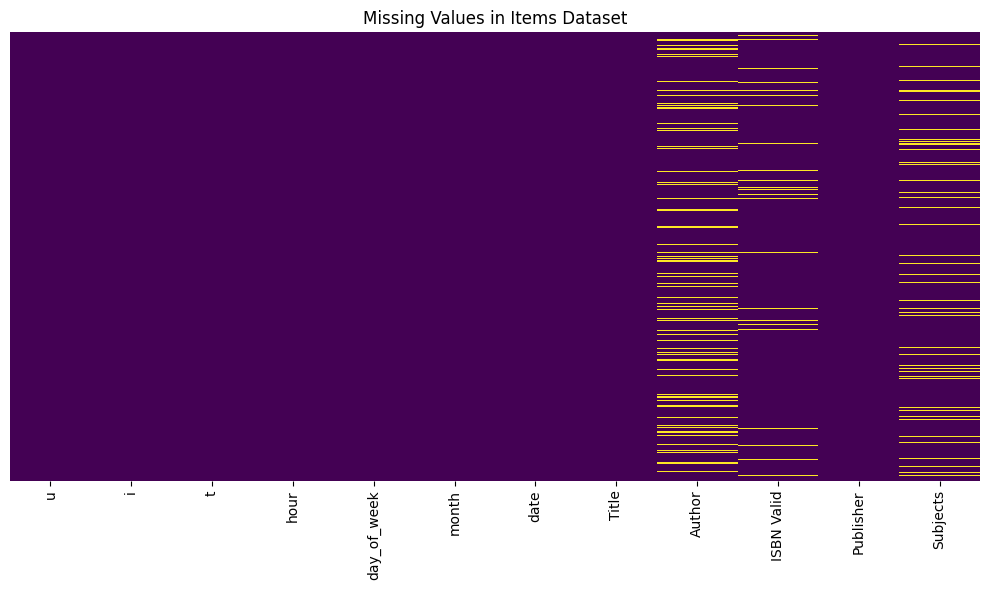

In [32]:
# Analyzing missing values in the datasets
print("Missing values in items dataset:")
missing_items = items.isnull().sum()
print(missing_items)
print("\nPercentage of missing values in items dataset:")
print((missing_items / len(items) * 100).round(2))

print("\nMissing values in interactions_with_items dataset:")
missing_interactions = interactions_with_items.isnull().sum()
print(missing_interactions)
print("\nPercentage of missing values in interactions_with_items dataset:")
print((missing_interactions / len(interactions_with_items) * 100).round(2))

# Visualizing missing data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(interactions_with_items.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Items Dataset')
plt.tight_layout()
plt.show()

In [33]:
# Create a copy of the items dataframe to work with
items_cleaned = items.copy()

# Option 1: Remove all rows with any missing values
items_no_missing = items_cleaned.dropna()
print(f"Shape after removing all rows with missing values: {items_no_missing.shape}")
print(f"Removed {items.shape[0] - items_no_missing.shape[0]} rows out of {items.shape[0]} total rows")


Shape after removing all rows with missing values: (10147, 6)
Removed 5144 rows out of 15291 total rows


In [34]:
import requests
import time
import pandas as pd
from tqdm.notebook import tqdm

# Create a copy of the items dataframe to work with
items_improved = items.copy()

# Function to extract first ISBN number from the ISBN Valid field
def extract_first_isbn(isbn_field):
    if pd.isna(isbn_field):
        return None
    # Split by semicolon and take first value
    isbn_list = str(isbn_field).split(';')
    if len(isbn_list) > 0:
        # Clean up the ISBN
        isbn = isbn_list[0].strip()
        # Remove any non-digit characters if needed
        isbn = ''.join(c for c in isbn if c.isdigit())
        return isbn
    return None

# Function to fetch book metadata from Google Books API
def fetch_book_metadata(isbn):
    if not isbn:
        return None, None, None

    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            items = data.get("items", [])
            if items:
                volume_info = items[0].get("volumeInfo", {})
                authors = volume_info.get("authors", [])
                author = authors[0] if authors else None
                publisher = volume_info.get("publisher")
                categories = volume_info.get("categories", [])
                category = categories[0] if categories else None
                return author, publisher, category
    except Exception as e:
        print(f"Error fetching data for ISBN {isbn}: {e}")

    return None, None, None

# Count missing values before enhancement
print("Missing values before enhancement:")
print(items.isnull().sum())

# Process books with missing data that have ISBNs
missing_author_items = items_improved[(items_improved['Author'].isna()) & (~items_improved['ISBN Valid'].isna())]
missing_subject_items = items_improved[(items_improved['Subjects'].isna()) & (~items_improved['ISBN Valid'].isna())]

# Combine indices to avoid processing the same book twice
all_indices = list(set(missing_author_items.index) | set(missing_subject_items.index))

# Process books with API calls (with rate limiting)
print(f"\nFetching metadata for {len(all_indices)} books with missing data...")

successful_fetches = 0
for idx in tqdm(all_indices):
    # Check if we need to process this book
    need_author = pd.isna(items_improved.at[idx, 'Author'])
    need_subject = pd.isna(items_improved.at[idx, 'Subjects'])

    if need_author or need_subject:
        isbn = extract_first_isbn(items_improved.at[idx, 'ISBN Valid'])
        if isbn:
            author, publisher, category = fetch_book_metadata(isbn)

            if author and need_author:
                items_improved.at[idx, 'Author'] = author
                successful_fetches += 1

            if category and need_subject:
                items_improved.at[idx, 'Subjects'] = category
                successful_fetches += 1

            if publisher and pd.isna(items_improved.at[idx, 'Publisher']):
                items_improved.at[idx, 'Publisher'] = publisher

            # Sleep to respect API rate limits
            time.sleep(0.1)

# For remaining missing values, use defaults
items_improved['Author'] = items_improved['Author'].fillna("Unknown Author")
items_improved['Subjects'] = items_improved['Subjects'].fillna("Uncategorized")
items_improved['Publisher'] = items_improved['Publisher'].fillna("Unknown Publisher")
items_improved['ISBN Valid'] = items_improved['ISBN Valid'].fillna("Not Available")

# Print statistics on the enhanced dataset
print("\nMissing values after enhancement:")
print(items_improved.isnull().sum())
print(f"\nSuccessful API metadata fetches: {successful_fetches}")

# Create the enhanced version of interactions_with_items
interactions_with_items_improved = interactions.merge(items_improved, on='i', how='left')

# Check for any remaining missing values
print("\nMissing values in enhanced interactions with items:")
print(interactions_with_items_improved.isnull().sum())

# Show a sample of the enhanced data
print("\nSample of enhanced data:")
print(interactions_with_items_improved.sample(5))

Missing values before enhancement:
Title            0
Author        2653
ISBN Valid     723
Publisher       25
Subjects      2223
i                0
dtype: int64

Fetching metadata for 4412 books with missing data...


  0%|          | 0/4412 [00:00<?, ?it/s]


Missing values after enhancement:
Title         0
Author        0
ISBN Valid    0
Publisher     0
Subjects      0
i             0
dtype: int64

Successful API metadata fetches: 820

Missing values in enhanced interactions with items:
u              0
i              0
t              0
hour           0
day_of_week    0
month          0
date           0
Title          0
Author         0
ISBN Valid     0
Publisher      0
Subjects       0
dtype: int64

Sample of enhanced data:
          u      i                   t  hour  day_of_week  month        date  \
13500   353   4109 2023-12-14 14:41:33    14            3     12  2023-12-14   
70211  1228   9630 2024-05-21 10:47:11    10            1      5  2024-05-21   
9998    172   2331 2023-02-20 16:06:47    16            0      2  2023-02-20   
1774    216   1716 2023-01-10 11:22:27    11            1      1  2023-01-10   
31224  1496  10534 2023-09-07 15:36:11    15            3      9  2023-09-07   

                                         